## Step-by-step analysis

In [27]:
import epynet as en
wds = en.Network("anytown.inp")
# after the creation it automatically loads the network (load_network())

ObjectCollection class treats groups of elements as dictionaries. It returns pd.Series.

BaseObject: {
    Link: {
        Pump,
        Pipe,
        Valve
    };
    Node: {
        Reservoir,
        Junction,
        Tank
    }
}

Each componet has attributes, which have to be set before the simulation, and properties, which are modified with the simulation and can be retreived as _results_.

Pump attributes: { length, initstatus, speed } <br>
Pump properties: { flow, energy}



In [28]:
wds.pumps['78'].speed = 1.0
wds.pumps.speed

78    1.0
79    1.0
dtype: float64

In [29]:
wds.patterns['1'].values

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Let's try to create a random pattern to grasp how step-by-step simulation works.

In [30]:
import random
import pandas as pd 

custom_multipliers = []
for i in range(0, 24):
    custom_multipliers.append(round(random.uniform(0.5,1.5), 2))

custom_multipliers = pd.Series(custom_multipliers)

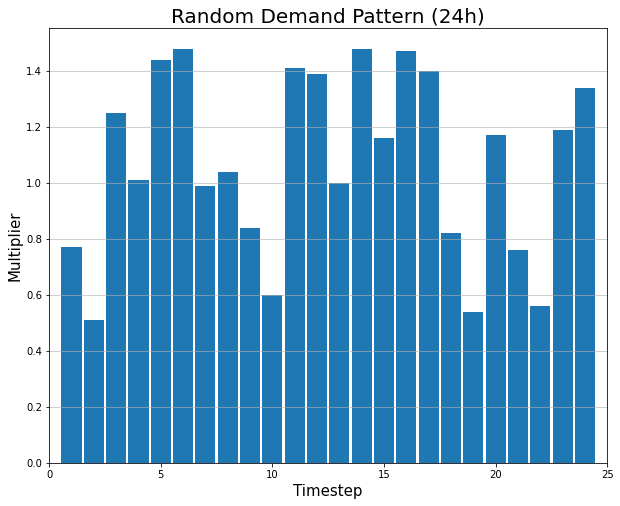

In [31]:
import matplotlib.pyplot as plt

#day_night_cycle = ['#e1f8ff', '#c9ebff', '#abb5ff', '#7475b6', '#5148b2']
plt.figure(figsize=[10,8])
plt.bar(x=range(1,25), height=custom_multipliers, width=0.9) 
plt.xlim(0, 25)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Timestep", fontsize=15)
plt.ylabel("Multiplier", fontsize=15)
plt.title("Random Demand Pattern (24h)", fontsize=20)
plt.show()

In [32]:
wds.add_pattern('2', custom_multipliers)

In [37]:
wds.patterns

{'1': <epynet.pattern.Pattern at 0x1ded33f94a8>,
 '4': <epynet.pattern.Pattern at 0x1ded33f9470>,
 '2': <epynet.pattern.Pattern at 0x1ded33e7400>}

In [43]:
for junc in wds.junctions:
    junc.pattern = 0
for junc in wds.junctions:
    print(junc.uid + ': ' + str(junc.pattern.index))

1: 2
2: 2
3: 2
4: 2
5: 2
6: 2
7: 2
8: 2
9: 2
10: 2
11: 2
12: 2
13: 2
14: 2
15: 2
16: 2
17: 2
18: 2
19: 2
20: 2
21: 2
22: 2


Now we need to set the time parameters, which are:
1. EN_DURATION: Total simulation duration.    
2. EN_HYDSTEP: Hydraulic time step. 
3. EN_QUALSTEP: Water quality time step. 
4. EN_PATTERNSTEP: Time pattern period. 
5. EN_PATTERNSTART: Time when time patterns begin. 
6. EN_REPORTSTEP: Reporting time step. 
7. EN_REPORTSTART: Time when reporting starts. 
8. EN_RULESTEP: Rule-based control evaluation time step. 
9. EN_STATISTIC: Reporting statistic code
10. EN_PERIODS: Number of reporting time periods (read only) 

Timevalue: value of time parameter in seconds


In [9]:
import utils

utils.time_parameters_summary(wds)

('EN_DURATION', 0)
('EN_HYDSTEP', 60)
('EN_QUALSTEP', 60)
('EN_PATTERNSTEP', 3600)
('EN_PATTERNSTART', 0)
('EN_REPORTSTEP', 3600)
('EN_REPORTSTART', 0)
('EN_RULESTEP', 6)
('EN_STATISTIC', 0)
('EN_PERIODS', 0)
('EN_STARTTIME', 64800)


In [10]:
wds.ep.ENsettimeparam(0, 86400)
utils.time_parameters_summary(wds)

('EN_DURATION', 86400)
('EN_HYDSTEP', 60)
('EN_QUALSTEP', 60)
('EN_PATTERNSTEP', 3600)
('EN_PATTERNSTART', 0)
('EN_REPORTSTEP', 3600)
('EN_REPORTSTART', 0)
('EN_RULESTEP', 6)
('EN_STATISTIC', 0)
('EN_PERIODS', 0)
('EN_STARTTIME', 64800)


In [11]:
wds.solve()
wds.junctions.pressure

1     86.223584
2     61.313746
3     60.089327
4     58.864908
5     48.953661
6     48.186415
7     48.040899
8     47.895383
9     34.494524
10    33.890095
11    34.396374
12    58.245221
13    61.465906
14    54.667822
15    57.080444
16    35.747431
17    33.215184
18    57.745103
19    57.369476
20    86.232836
21    54.349186
22    33.012032
dtype: float64

In [12]:
wds.solve(2)
utils.time_parameters_summary(wds)

('EN_DURATION', 86400)
('EN_HYDSTEP', 60)
('EN_QUALSTEP', 60)
('EN_PATTERNSTEP', 3600)
('EN_PATTERNSTART', 2)
('EN_REPORTSTEP', 3600)
('EN_REPORTSTART', 0)
('EN_RULESTEP', 6)
('EN_STATISTIC', 0)
('EN_PERIODS', 0)
('EN_STARTTIME', 64800)


In [13]:
def run_step_by_step():
    wds.reset()
    wds.time = []
    
    wds.ep.ENopenH()
    wds.ep.ENinitH(0)
    
    simtime = 0
    timestep = 1
    
    while timestep > 0:
        wds.ep.ENrunH()
        timestep = wds.ep.ENnextH()
        wds.time.append(simtime)
        wds.load_attributes(simtime)
        simtime += timestep
    
    wds.ep.ENcloseH()

In [14]:
wds.ep.ENsettimeparam(4, 0)
utils.time_parameters_summary(wds)

('EN_DURATION', 86400)
('EN_HYDSTEP', 60)
('EN_QUALSTEP', 60)
('EN_PATTERNSTEP', 3600)
('EN_PATTERNSTART', 0)
('EN_REPORTSTEP', 3600)
('EN_REPORTSTART', 0)
('EN_RULESTEP', 6)
('EN_STATISTIC', 0)
('EN_PERIODS', 0)
('EN_STARTTIME', 64800)


In [15]:
wds.ep.ENsettimeparam(0, 3600)
utils.time_parameters_summary(wds)
run_step_by_step()

('EN_DURATION', 3600)
('EN_HYDSTEP', 60)
('EN_QUALSTEP', 60)
('EN_PATTERNSTEP', 3600)
('EN_PATTERNSTART', 0)
('EN_REPORTSTEP', 3600)
('EN_REPORTSTART', 0)
('EN_RULESTEP', 6)
('EN_STATISTIC', 0)
('EN_PERIODS', 0)
('EN_STARTTIME', 64800)


In [16]:
wds.junctions['1'].pressure

c:\users\david\appdata\local\programs\python\python36\lib\site-packages\epynet\baseobject.py:63: UserWarning: requesting dynamic properties from an unsolved network
  warnings.warn("requesting dynamic properties from an unsolved network")


0       86.223584
60      86.227882
120     86.232177
180     86.236472
240     86.240764
          ...    
3360    86.461316
3420    86.465503
3480    86.469688
3540    86.473871
3600    86.478051
Length: 61, dtype: float64

In [17]:
len(wds.pumps['78'].results['flow'])

61

In [18]:
wds.ep.ENsettimeparam(0, 86400)
run_step_by_step()

c:\users\david\appdata\local\programs\python\python36\lib\site-packages\epynet\epanet2.py:677: UserWarning: WARNING: Pumps cannot deliver enough flow or head.
  warnings.warn(self.ENgeterror(ierr))


In [19]:
len(wds.pumps['78'].results['flow'])

1442

In [20]:
wds.junctions.basedemand

1     113.565002
2      45.425999
3      45.425999
4     136.278000
5     136.278000
6     136.278000
7     136.278000
8      90.851997
9      90.851997
10     90.851997
11     90.851997
12    113.565002
13    113.565002
14    113.565002
15    113.565002
16     90.851997
17    227.130005
18    113.565002
19    227.130005
20      0.000000
21      0.000000
22      0.000000
dtype: float64

In [21]:
iterables = [wds.junctions.uid, ['head', 'pressure', 'demand']]
cols_index = pd.MultiIndex.from_product(iterables, names=["id", "properties"])

In [22]:
import datetime
times = [datetime.timedelta(seconds=time) for time in wds.time]

In [23]:
df = pd.DataFrame(0, index=times, columns=cols_index)

In [24]:
wds.junctions.results

1     {'head': [92.31958361237028, 92.32388159908787...
2     {'head': [76.55374628627844, 76.61742632638767...
3     {'head': [75.32932707869972, 75.39651524157877...
4     {'head': [74.10490787112103, 74.17560415676985...
5     {'head': [73.33766134277477, 73.41039361845354...
6     {'head': [72.57041481442849, 72.64518308013722...
7     {'head': [72.42489888879999, 72.50005330024257...
8     {'head': [72.27938296317146, 72.35492352034794...
9     {'head': [71.07052416966434, 71.14541188620842...
10    {'head': [70.46609478943607, 70.54065608567288...
11    {'head': [70.97237382646334, 71.04525403567321...
12    {'head': [73.48522133916357, 73.55143809380111...
13    {'head': [76.70590642725101, 76.76882415172545...
14    {'head': [69.9078222757869, 70.00255884501658,...
15    {'head': [72.32044393070728, 72.3965419428787,...
16    {'head': [72.32343077089752, 72.39969692163199...
17    {'head': [69.79118354463927, 69.8666214208589,...
18    {'head': [72.98510262276743, 73.0578459011

In [25]:
for i,j in zip(df.columns.get_level_values(0), df.columns.get_level_values(1)):
    df[i,j] = wds.junctions.results[i][j]

In [26]:
df

id                       1                            2                    \
properties            head   pressure demand       head   pressure demand   
0 days 00:00:00  92.319584  86.223584    0.0  76.553746  61.313746    0.0   
0 days 00:01:00  92.323882  86.227882    0.0  76.617426  61.377426    0.0   
0 days 00:02:00  92.328177  86.232177    0.0  76.680997  61.440997    0.0   
0 days 00:03:00  92.332472  86.236472    0.0  76.744424  61.504424    0.0   
0 days 00:04:00  92.336764  86.240764    0.0  76.807706  61.567706    0.0   
...                    ...        ...    ...        ...        ...    ...   
0 days 23:56:00  94.488000  88.392000    0.0  94.488000  79.248000    0.0   
0 days 23:57:00  94.488000  88.392000    0.0  94.488000  79.248000    0.0   
0 days 23:58:00  94.488000  88.392000    0.0  94.488000  79.248000    0.0   
0 days 23:59:00  94.488000  88.392000    0.0  94.488000  79.248000    0.0   
1 days 00:00:00  94.488000  88.392000    0.0  94.488000  79.248000    0.0   

id                       3                            4  ...     19  \
properties            head   pressure demand       head  ... demand   
0 days 00:00:00  75.329327  60.089327    0.0  74.104908  ...    0.0   
0 days 00:01:00  75.396515  60.156515    0.0  74.175604  ...    0.0   
0 days 00:02:00  75.463652  60.223652    0.0  74.246306  ...    0.0   
0 days 00:03:00  75.530643  60.290643    0.0  74.316863  ...    0.0   
0 days 00:04:00  75.597490  60.357490    0.0  74.387274  ...    0.0   
...                    ...        ...    ...        ...  ...    ...   
0 days 23:56:00  94.488000  79.248000    0.0  94.488000  ...    0.0   
0 days 23:57:00  94.488000  79.248000    0.0  94.488000  ...    0.0   
0 days 23:58:00  94.488000  79.248000    0.0  94.488000  ...    0.0   
0 days 23:59:00  94.488000  79.248000    0.0  94.488000  ...    0.0   
1 days 00:00:00  94.488000  79.248000    0.0  94.488000  ...    0.0   

id                      20                           21                    \
properties            head   pressure demand       head   pressure demand   
0 days 00:00:00  92.328836  86.232836    0.0  69.589186  54.349186    0.0   
0 days 00:01:00  92.333100  86.237100    0.0  69.685687  54.445687    0.0   
0 days 00:02:00  92.337362  86.241362    0.0  69.781900  54.541900    0.0   
0 days 00:03:00  92.341623  86.245623    0.0  69.877825  54.637825    0.0   
0 days 00:04:00  92.345881  86.249881    0.0  69.973464  54.733464    0.0   
...                    ...        ...    ...        ...        ...    ...   
0 days 23:56:00  94.488000  88.392000    0.0  94.488000  79.248000    0.0   
0 days 23:57:00  94.488000  88.392000    0.0  94.488000  79.248000    0.0   
0 days 23:58:00  94.488000  88.392000    0.0  94.488000  79.248000    0.0   
0 days 23:59:00  94.488000  88.392000    0.0  94.488000  79.248000    0.0   
1 days 00:00:00  94.488000  88.392000    0.0  94.488000  79.248000    0.0   

id                      22                    
properties            head   pressure demand  
0 days 00:00:00  69.588032  33.012032    0.0  
0 days 00:01:00  69.663723  33.087723    0.0  
0 days 00:02:00  69.739364  33.163364    0.0  
0 days 00:03:00  69.814952  33.238952    0.0  
0 days 00:04:00  69.890487  33.314487    0.0  
...                    ...        ...    ...  
0 days 23:56:00  94.488000  57.912000    0.0  
0 days 23:57:00  94.488000  57.912000    0.0  
0 days 23:58:00  94.488000  57.912000    0.0  
0 days 23:59:00  94.488000  57.912000    0.0  
1 days 00:00:00  94.488000  57.912000    0.0  

[1442 rows x 66 columns]